# BERTScore Evaluation Notebook

## Purpose
This notebook retrieves and visualizes BERTScore metrics (Precision, Recall, and F1) for different inference experiments using the google/gemma-7b-it. The experiments included in this analysis are:
- `llm_vanilla`
- `llm_rag`
- `llm_finetuned`
- `llm_finetuned_rag`

The metrics are fetched via the **Palaven API**, and the results are plotted for comparison across batches. The primary goal is to evaluate how each model performs in terms of Precision, Recall, and F1 scores across multiple batches.








### 1. Setup and Initialization

In [1]:
from google.colab import userdata
from palaven_api_v2 import PalavenApi

evaluation_session_id = 'EB9C5839-7B20-4D7D-B3F7-17528180676D'
palaven_base_url = userdata.get('palaven-base-url')

palaven_api = PalavenApi(palaven_base_url)

### 2. Metric Fetching

In [2]:
def fetch_bert_score_metrics_by_exercise(exercise_name):
  metrics = palaven_api.fetch_bert_score_metrics(evaluation_session_id, exercise_name)
  return metrics

### 3. Data Processing

In [3]:
llm_vanilla_exercise = 'llmvanilla'
llm_vanilla_precision = []
llm_vanilla_recall = []
llm_vanilla_f1 = []

llm_vanilla_metrics = fetch_bert_score_metrics_by_exercise(llm_vanilla_exercise)

for metric in llm_vanilla_metrics:
  llm_vanilla_precision.append(metric['precision'])
  llm_vanilla_recall.append(metric['recall'])
  llm_vanilla_f1.append(metric['f1'])

In [4]:
llm_rag_exercise = 'llmrag'
llm_rag_precision = []
llm_rag_recall = []
llm_rag_f1 = []

llm_rag_metrics = fetch_bert_score_metrics_by_exercise(llm_rag_exercise)

for metric in llm_rag_metrics:
  llm_rag_precision.append(metric['precision'])
  llm_rag_recall.append(metric['recall'])
  llm_rag_f1.append(metric['f1'])

In [5]:
llm_finetuned_exercise = 'llmfinetuned'
llm_finetuned_precision = []
llm_finetuned_recall = []
llm_finetuned_f1 = []

llm_finetuned_metrics = fetch_bert_score_metrics_by_exercise(llm_finetuned_exercise)

for metric in llm_finetuned_metrics:
  llm_finetuned_precision.append(metric['precision'])
  llm_finetuned_recall.append(metric['recall'])
  llm_finetuned_f1.append(metric['f1'])

In [6]:
llm_finetuned_rag_exercise = 'llmfinetunedrag'
llm_finetuned_rag_precision = []
llm_finetuned_rag_recall = []
llm_finetuned_rag_f1 = []

llm_finetuned_rag_metrics = fetch_bert_score_metrics_by_exercise(llm_finetuned_rag_exercise)

for metric in llm_finetuned_rag_metrics:
  llm_finetuned_rag_precision.append(metric['precision'])
  llm_finetuned_rag_recall.append(metric['recall'])
  llm_finetuned_rag_f1.append(metric['f1'])

### 4. Visualization

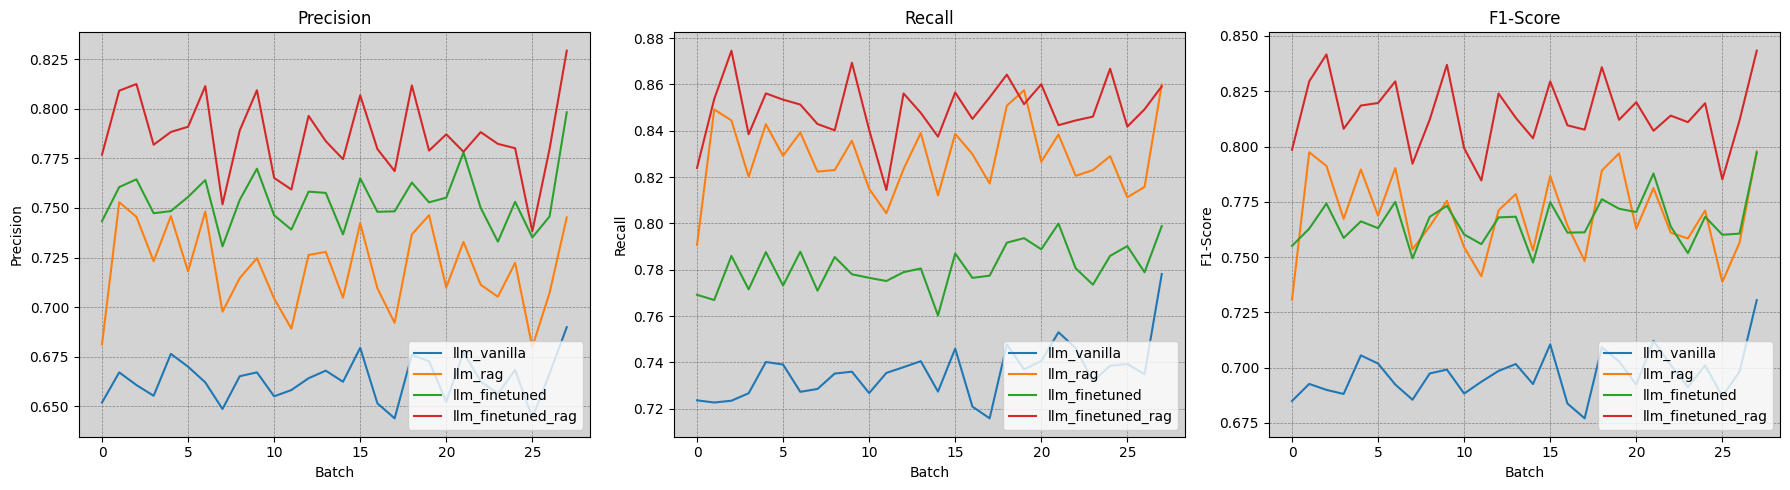

In [7]:
import matplotlib.pyplot as plt

metrics = ['precision', 'recall', 'f1']
models = ['llm_vanilla', 'llm_rag', 'llm_finetuned', 'llm_finetuned_rag']

precision_data = [llm_vanilla_precision, llm_rag_precision, llm_finetuned_precision, llm_finetuned_rag_precision]
recall_data = [llm_vanilla_recall, llm_rag_recall, llm_finetuned_recall, llm_finetuned_rag_recall]
f1_data = [llm_vanilla_f1, llm_rag_f1, llm_finetuned_f1, llm_finetuned_rag_f1]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for axis in ax:
    axis.set_facecolor('lightgray')
    axis.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

for i, model in enumerate(models):
    ax[0].plot(precision_data[i], label=model)

ax[0].set_title('Precision')
ax[0].set_xlabel('Batch')
ax[0].set_ylabel('Precision')
ax[0].legend(loc='lower right')


for i, model in enumerate(models):
    ax[1].plot(recall_data[i], label=model)

ax[1].set_title('Recall')
ax[1].set_xlabel('Batch')
ax[1].set_ylabel('Recall')
ax[1].legend(loc='lower right')


for i, model in enumerate(models):
    ax[2].plot(f1_data[i], label=model)

ax[2].set_title('F1-Score')
ax[2].set_xlabel('Batch')
ax[2].set_ylabel('F1-Score')
ax[2].legend(loc='lower right')

plt.tight_layout()
plt.show()